In [109]:
!pip install xlrd==1.2.0


In [110]:

!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx
import pandas as pd
import xlrd 
import matplotlib.pyplot as plt


In [111]:
categories = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true', "categories")
brands = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true',"brands")
products =  pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true',"products")


1.il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria

In [112]:
products_brand = pd.merge(products,brands,how="outer",on = "brand_id")
products_brand_categories = pd.merge(products_brand,categories,how="outer",on = "category_id")[["product_name","brand_name","category_name"]]
products_brand_categories

,product_name,brand_name,category_name
0,Trek 820 - 2016,Trek,Mountain Bikes
1,Trek Fuel EX 8 29 - 2016,Trek,Mountain Bikes
2,Trek Slash 8 27.5 - 2016,Trek,Mountain Bikes
3,Trek Remedy 29 Carbon Frameset - 2016,Trek,Mountain Bikes
4,Trek X-Caliber 8 - 2017,Trek,Mountain Bikes
...,...,...,...
316,Sun Bicycles Cruz 7 - 2017,Sun Bicycles,Comfort Bicycles
317,Sun Bicycles Cruz 3 - Women's - 2017,Sun Bicycles,Comfort Bicycles
318,Sun Bicycles Cruz 7 - Women's - 2017,Sun Bicycles,Comfort Bicycles
319,Sun Bicycles Drifter 7 - 2017,Sun Bicycles,Comfort Bicycles


2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.

In [113]:
prod_categories = pd.merge(products,categories,how = "inner", on = "category_id").groupby("category_name")[["product_name"]].count().sort_values(by= "product_name", ascending = False).reset_index()
prod_categories

,category_name,product_name
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30
5,Electric Bikes,24
6,Cyclocross Bicycles,10


3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti

In [114]:
products_brand.groupby("brand_name",as_index=False)["product_name"].count()

,brand_name,product_name
0,Electra,118
1,Haro,10
2,Heller,3
3,Pure Cycles,3
4,Ritchey,1
5,Strider,3
6,Sun Bicycles,23
7,Surly,25
8,Trek,135


4. i nomi dei prodotti della marca Trek


In [115]:
products_brand = pd.merge(products,brands,how="outer",on = "brand_id")
trek = products_brand[products_brand["brand_name"]=="Trek"][["product_name"]]
trek

,product_name
0,Trek 820 - 2016
1,Trek Fuel EX 8 29 - 2016
2,Trek Slash 8 27.5 - 2016
3,Trek Remedy 29 Carbon Frameset - 2016
4,Trek Conduit+ - 2016
...,...
130,Trek Checkpoint ALR 5 - 2019
131,Trek Checkpoint ALR 5 Women's - 2019
132,Trek Checkpoint SL 5 Women's - 2019
133,Trek Checkpoint SL 6 - 2019


5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome

In [116]:
product_categorie = pd.merge(products,categories,how = "inner", on = "category_id")
Bikesprodotti = product_categorie[product_categorie["category_name"].str.contains("Bikes")][["category_name"]]
Bikesprodotti

,category_name
0,Mountain Bikes
1,Mountain Bikes
2,Mountain Bikes
3,Mountain Bikes
4,Mountain Bikes
...,...
316,Road Bikes
317,Road Bikes
318,Road Bikes
319,Road Bikes


6. la categoria che ha il prodotto che costa di più

In [117]:
df2 = pd.merge(products,categories,how = "inner", on = "category_id").groupby("category_name",as_index=False)["list_price"].max().sort_values(by="list_price").tail(1)
df2 

,category_name,list_price
6,Road Bikes,11999.99


7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti

In [118]:
df3 = pd.merge(products,brands,how="inner",on = "brand_id").groupby("brand_name",as_index=False)["product_name"].count().sort_values(by="product_name",ascending = False)
df4 = df3.loc[(df3["product_name"]>= 100)]
df4



,brand_name,product_name
8,Trek,135
0,Electra,118


8. la marca del prodotto 'Electra Townie Original 21D - 2016'

In [119]:
products_brand[products_brand['product_name'] == 'Electra Townie Original 21D - 2016'][['brand_name']]

,brand_name
164,Electra
173,Electra





9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti

In [120]:
all = pd.merge(product_categorie,brands ,how = "inner", on="brand_id")
all

,product_id,product_name,brand_id,category_id,model_year,list_price,category_name,brand_name
0,1,Trek 820 - 2016,9,6,2016.0,379.99,Mountain Bikes,Trek
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99,Mountain Bikes,Trek
2,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99,Mountain Bikes,Trek
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99,Mountain Bikes,Trek
4,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99,Mountain Bikes,Trek
...,...,...,...,...,...,...,...,...
316,18,Pure Cycles Western 3-Speed - Women's - 2015/2016,4,3,2016.0,449.00,Cruisers Bicycles,Pure Cycles
317,19,Pure Cycles William 3-Speed - 2016,4,3,2016.0,449.00,Cruisers Bicycles,Pure Cycles
318,263,Strider Classic 12 Balance Bike - 2018,6,1,2018.0,89.99,Children Bicycles,Strider
319,264,Strider Sport 16 - 2018,6,1,2018.0,249.99,Children Bicycles,Strider


In [121]:
torta2 = all.groupby('model_year')['product_name'].count()
torta2

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_name, dtype: int64

<function matplotlib.pyplot.show>

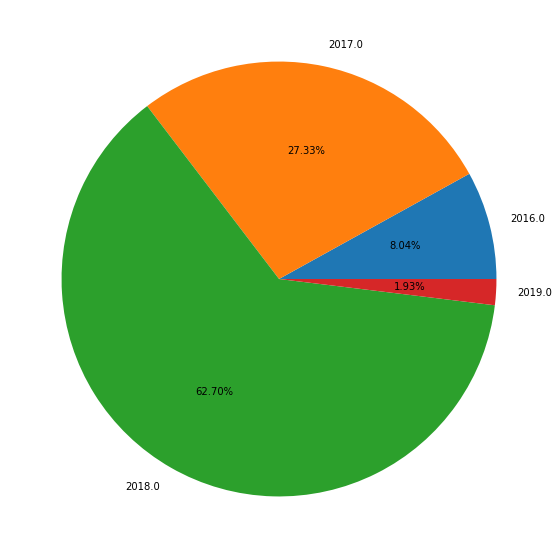

In [122]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.pie(torta2.values, labels=torta2.index, autopct= '%1.2f%%')
plt.show